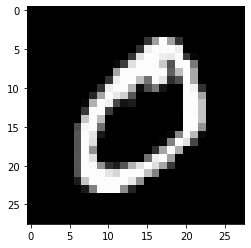

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import cv2 
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[1], cmap="gray")

In [2]:
x_train = x_train/255.0
x_test = x_test/255.0

# Working

Here a functional method is used to create a neural network of the autoencoder and this works by linking the layer like the variable = keras.layer.someLayer(name_of_the_previous_layer). The Sequential method is preferred for small networks and for more complex and larger networks Functional model is preferred. In the model below first is the encoder part where the ANN is trying to reduce the data and is trying to extract all the important features form image. In the second part of the decoder this is where the neural network is trying to extract the data back from the compressed form. This model is trained on mnist dataset and the output of this is also the mnist dataset as we wnat the network to get the exact data from the reduced form.

In [3]:
encoder_input = keras.Input(shape = (28,28,1), name = "img")
x = keras.layers.Flatten()(encoder_input)
encoder_out = keras.layers.Dense(9, activation='relu')(x)

encoder = keras.Model(encoder_input, encoder_out, name = "encoder")
decoder = keras.layers.Dense(784, activation='relu')(encoder_out)
decoder_output = keras.layers.Reshape((28,28,1))(decoder)

autoencoder = keras.Model(encoder_input, decoder_output, name = "autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 7065      
_________________________________________________________________
dense_1 (Dense)              (None, 784)               7840      
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 14,905
Trainable params: 14,905
Non-trainable params: 0
_________________________________________________________________


In [26]:
autoencoder.compile(keras.optimizers.Adam(lr=0.01, decay=1e-6), loss="mse", metrics=['accuracy'])

C:\Users\suyash\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [27]:
autoencoder.fit(x_train, x_train, epochs=10,batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 1ms/step - loss: 0.0397 - accuracy: 0.8032 - val_loss: 0.0395 - val_accuracy: 0.8028
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0396 - accuracy: 0.8033 - val_loss: 0.0397 - val_accuracy: 0.8025
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0397 - accuracy: 0.8032 - val_loss: 0.0393 - val_accuracy: 0.8026
Epoch 4/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0397 - accuracy: 0.8032 - val_loss: 0.0395 - val_accuracy: 0.8041
Epoch 5/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0396 - accuracy: 0.8032 - val_loss: 0.0395 - val_accuracy: 0.8032
Epoch 6/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0396 - accuracy: 0.8033 - val_loss: 0.0391 - val_accuracy: 0.8045
Epoch 7/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0397 - accuracy: 0.8032 - val_loss: 0.0392 - val_accuracy:

In [28]:
example = encoder.predict([x_test[15].reshape(-1,28,28,1)])[0]
example

array([0.7218142 , 0.        , 0.49104792, 1.3726034 , 0.65979123,
       0.1950047 , 0.6298807 , 1.3829923 , 0.        ], dtype=float32)

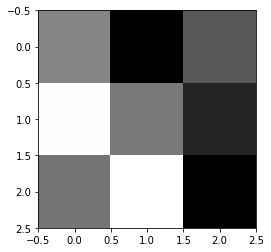

In [29]:
plt.imshow(example.reshape(3,3), cmap="gray")

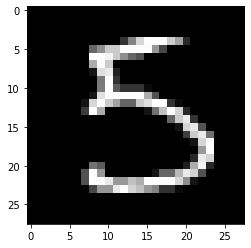

In [30]:
plt.imshow(x_test[15], cmap="gray")

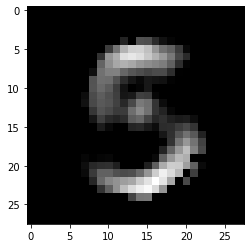

In [32]:
ae = autoencoder.predict([x_test[15].reshape(-1,28,28,1)])[0]
plt.imshow(ae, cmap="gray")

# Noise elimination

This type of neural network is able to get rid of noise as we have seen that it is able to reduce the data of the images into smaller sizes, this means that 

In [33]:
import random

def noisey(img, random_chance=10):
    noisy = []
    for row in img:
        new_row = []
        for pix in row:
            if random.choice(range(100))<= random_chance:
                new_val = random.uniform(0,1)
                new_row.append(new_val)
            else:
                new_row.append(pix)
        noisy.append(new_row)
    return np.array(noisy)

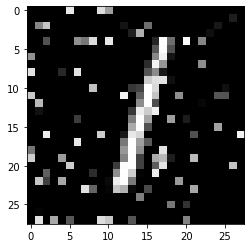

In [34]:
noisy = noisey(x_test[2])
plt.imshow(noisy, cmap="gray")

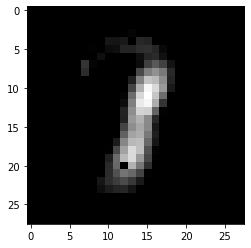

In [35]:
ae = autoencoder.predict([noisy.reshape(-1,28,28,1)])[0]
plt.imshow(ae, cmap="gray")